In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
df = pd.read_csv("amazon_cleaned_v2.csv")
print(df.shape)
df.head(3)

(10665, 12)


,product_id,product_name,category,rating,rating_count,discounted_price (₹),actual_price (₹),discount_percentage (%),user_id,user_name,review_id,review_title
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,24269,399.0,1099.0,64.0,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav,R3HXWT0LRP0NMF,Satisfied
1,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,24269,399.0,1099.0,64.0,AHMY5CWJMMK5BJRBBSNLYT3ONILA,Adarsh gupta,R2AJM3LFTLZHFO,Charging is really fast
2,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,24269,399.0,1099.0,64.0,AHCTC6ULH4XB6YHDY6PCH2R772LQ,Sundeep,R6AQJGUP6P86,Value for money


In [3]:
df.isnull().sum()

product_id                 0
product_name               0
category                   0
rating                     0
rating_count               0
discounted_price (₹)       0
actual_price (₹)           0
discount_percentage (%)    0
user_id                    0
user_name                  0
review_id                  0
review_title               0
dtype: int64

In [4]:
# Check for string values in columns
contains_string = df.applymap(lambda x: isinstance(x, str)).any()
print("Columns containing string values:")
print(contains_string)

# Check for integer values in columns
contains_int = df.applymap(lambda x: isinstance(x, int)).any()
print("Columns containing integer values:")
print(contains_int)

# Check for float values in columns
contains_float = df.applymap(lambda x: isinstance(x, float)).any()
print("Columns containing float values:")
print(contains_float)

Columns containing string values:
product_id                  True
product_name                True
category                    True
rating                     False
rating_count               False
discounted_price (₹)       False
actual_price (₹)           False
discount_percentage (%)    False
user_id                     True
user_name                   True
review_id                   True
review_title                True
dtype: bool
Columns containing integer values:
product_id                 False
product_name               False
category                   False
rating                     False
rating_count                True
discounted_price (₹)       False
actual_price (₹)           False
discount_percentage (%)    False
user_id                    False
user_name                  False
review_id                  False
review_title               False
dtype: bool
Columns containing float values:
product_id                 False
product_name               False
category        

C:\Users\khand\AppData\Local\Temp\ipykernel_12568\805857498.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contains_string = df.applymap(lambda x: isinstance(x, str)).any()
C:\Users\khand\AppData\Local\Temp\ipykernel_12568\805857498.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contains_int = df.applymap(lambda x: isinstance(x, int)).any()
C:\Users\khand\AppData\Local\Temp\ipykernel_12568\805857498.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contains_float = df.applymap(lambda x: isinstance(x, float)).any()


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10665 entries, 0 to 10664
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               10665 non-null  object 
 1   product_name             10665 non-null  object 
 2   category                 10665 non-null  object 
 3   rating                   10665 non-null  float64
 4   rating_count             10665 non-null  int64  
 5   discounted_price (₹)     10665 non-null  float64
 6   actual_price (₹)         10665 non-null  float64
 7   discount_percentage (%)  10665 non-null  float64
 8   user_id                  10665 non-null  object 
 9   user_name                10665 non-null  object 
 10  review_id                10665 non-null  object 
 11  review_title             10665 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 1000.0+ KB


In [6]:
df.columns

Index(['product_id', 'product_name', 'category', 'rating', 'rating_count',
       'discounted_price (₹)', 'actual_price (₹)', 'discount_percentage (%)',
       'user_id', 'user_name', 'review_id', 'review_title'],
      dtype='object')

# Data Visualiazaton

In [7]:
df.describe()

,rating,rating_count,discounted_price (₹),actual_price (₹),discount_percentage (%)
count,10665.000000,10665.000000,10665.000000,10665.000000,10665.000000
mean,4.092846,17815.667698,3167.273358,5479.871565,46.891045
std,0.286307,42328.636606,6897.706334,10743.195436,21.656878
min,2.000000,2.000000,39.000000,39.000000,0.000000
25%,3.900000,1173.000000,349.000000,899.000000,31.000000
50%,4.100000,4881.000000,889.000000,1750.000000,49.000000
75%,4.300000,16299.000000,2099.000000,4500.000000,63.000000
max,5.000000,426973.000000,77990.000000,139900.000000,94.000000


In [8]:
df.describe(include=[object])

,product_id,product_name,category,user_id,user_name,review_id,review_title
count,10665,10665,10665,10665,10665,10665,10665
unique,1351,1337,211,9037,7687,9256,6305
top,B09ZQK9X8G,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,AG5DWPD54QGSLWJ6QUFERLPNAX4Q,Amazon Customer,R3DQIEC603E7AY,Good
freq,16,40,1301,9,584,8,606


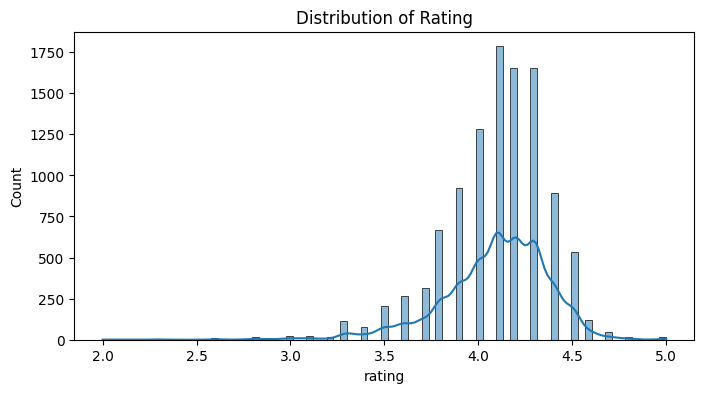

In [9]:
numerical_cols = ['rating', 'rating_count', 'discounted_price (₹)', 'actual_price (₹)', 'discount_percentage (%)']

plt.figure(figsize=(8,4))
sns.histplot(df['rating'], kde=True)
plt.title('Distribution of Rating')
plt.show()

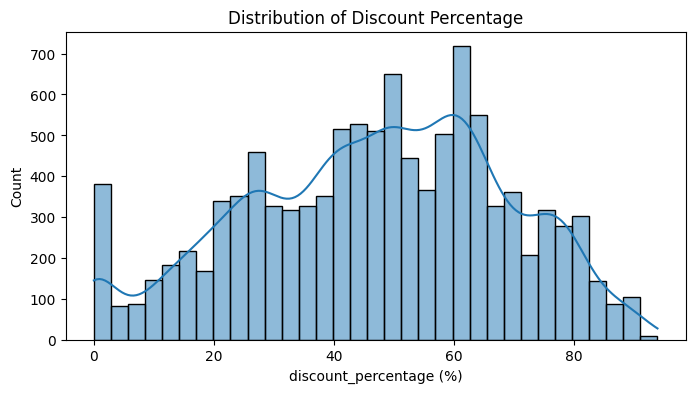

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(df['discount_percentage (%)'], kde=True)
plt.title('Distribution of Discount Percentage')
plt.show()

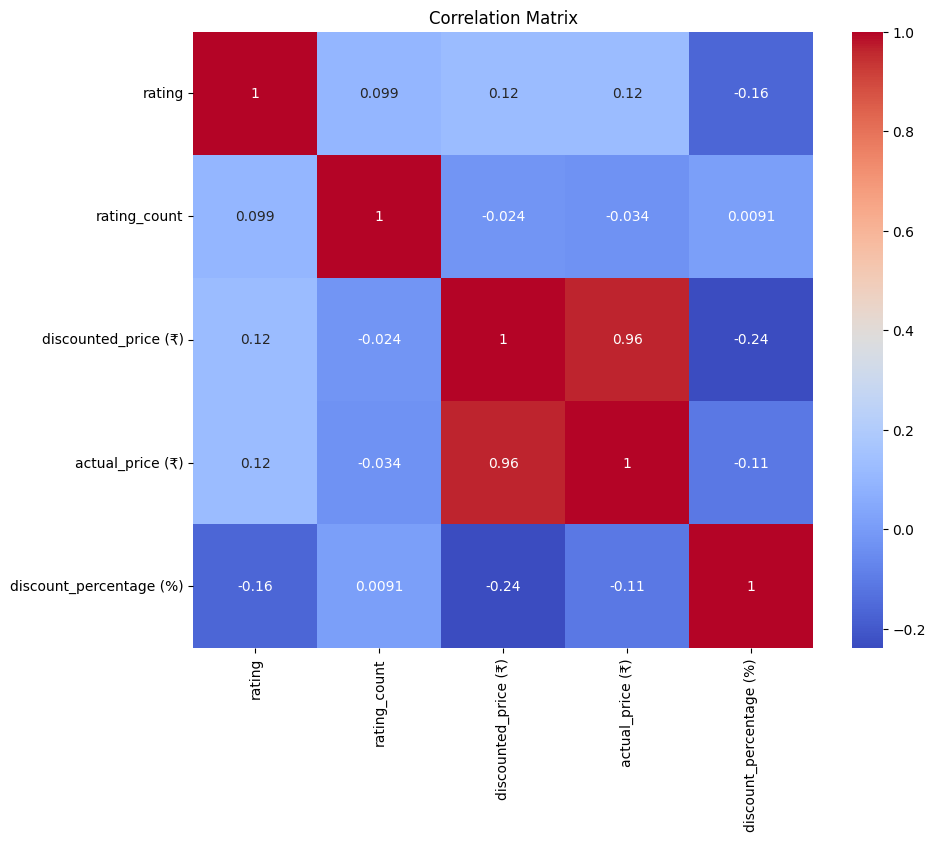

In [11]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [12]:
unique_values = df[['product_id', 'user_id', 'review_id']].nunique()
unique_values

product_id    1351
user_id       9037
review_id     9256
dtype: int64

C:\Users\khand\AppData\Local\Temp\ipykernel_12568\1631943125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='viridis')


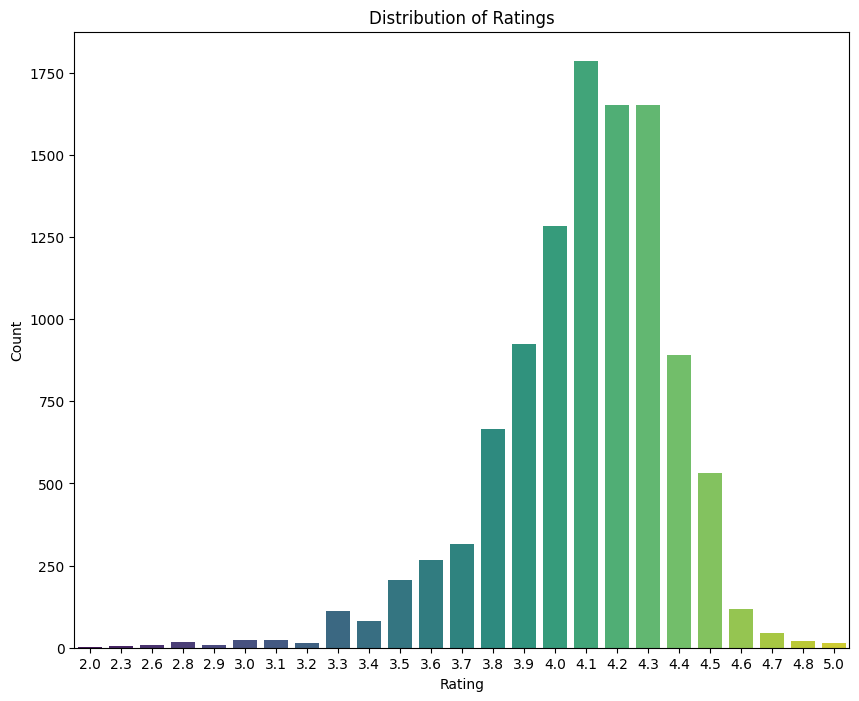

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='rating', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

C:\Users\khand\AppData\Local\Temp\ipykernel_1840\494464756.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=most_reviewed_products.index, x=most_reviewed_products.values, palette='viridis')


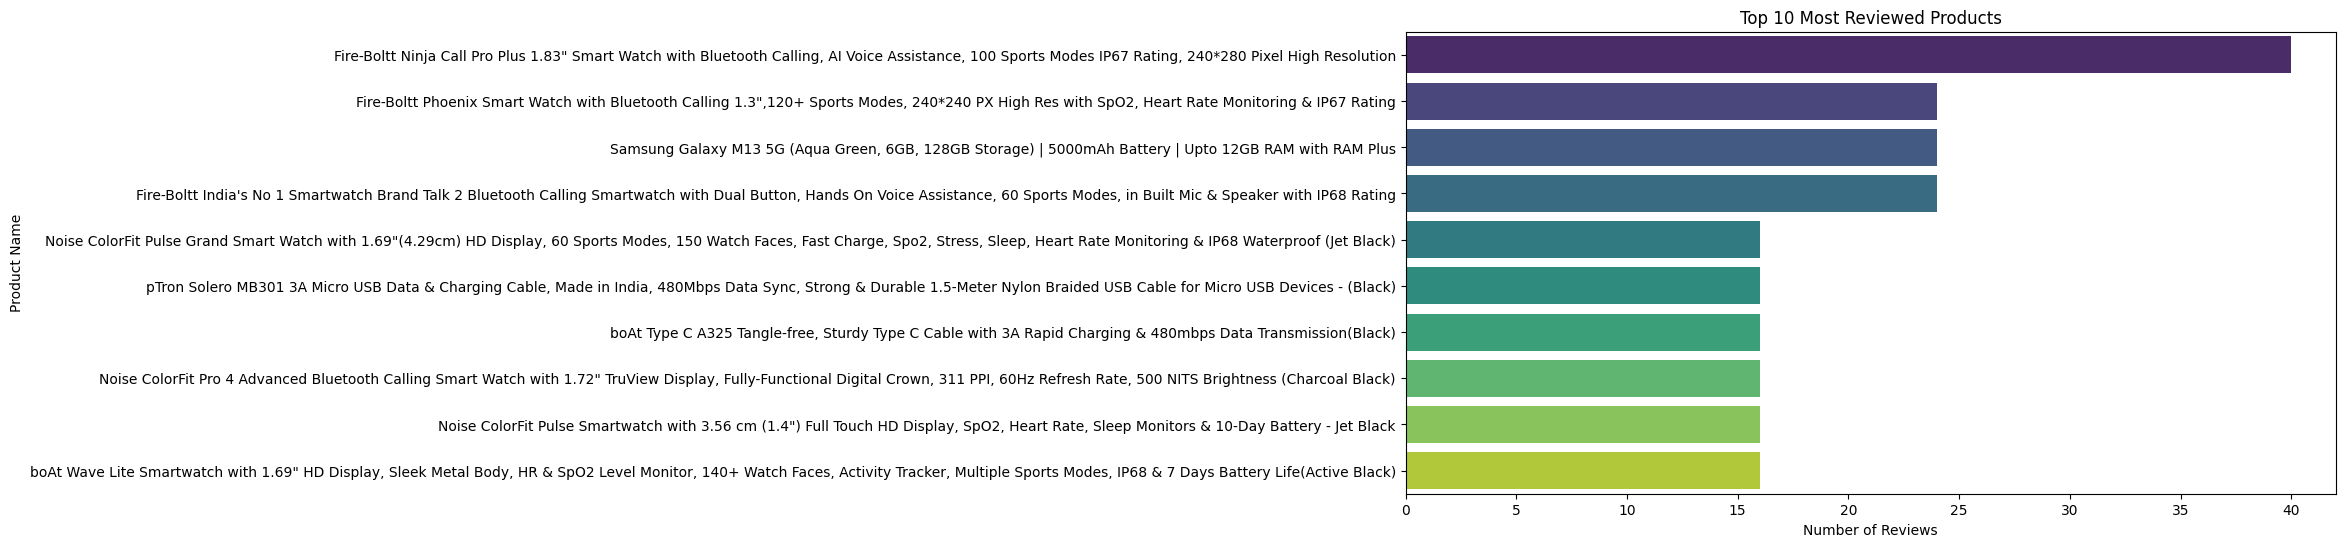

In [14]:
most_reviewed_products = df['product_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=most_reviewed_products.index, x=most_reviewed_products.values, palette='viridis')
plt.title('Top 10 Most Reviewed Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')
plt.show()

C:\Users\khand\AppData\Local\Temp\ipykernel_1840\347286949.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_products.index, x=top_10_products.values, palette='viridis')


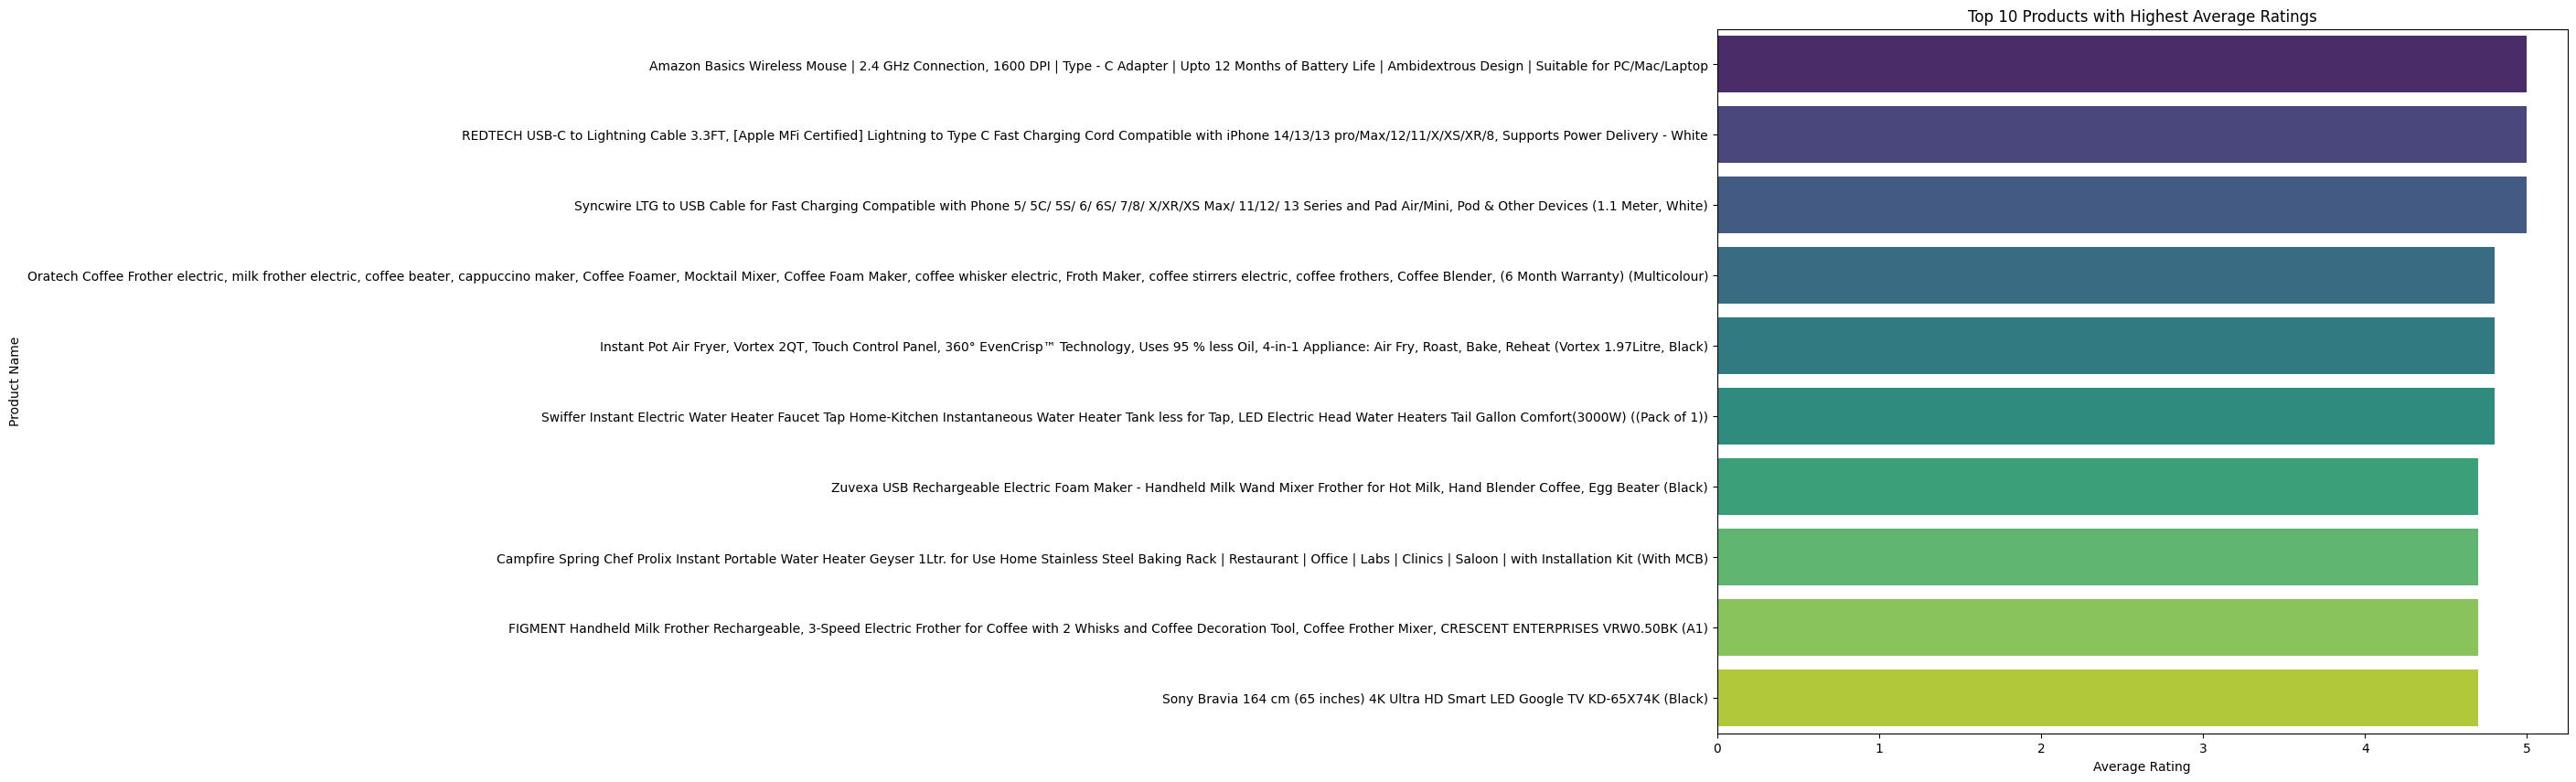

Top 10 Products with Highest Average Ratings:
product_name
Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop                                                                                                              5.0
REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White                                                                                   5.0
Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)                                                                                                 5.0
Oratech Coffee Frother electric, milk frother electric, coffee beater, cappuccino maker, Coffee Foamer, Mocktail 

In [15]:
# Calculate the average rating for each product
avg_rating_by_product = df.groupby('product_name')['rating'].mean().sort_values(ascending=False)

# Get the top 10 products with the highest average ratings
top_10_products = avg_rating_by_product.head(10)

# Plot the top 10 products
plt.figure(figsize=(12, 10))
sns.barplot(y=top_10_products.index, x=top_10_products.values, palette='viridis')
plt.title('Top 10 Products with Highest Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.show()

print("Top 10 Products with Highest Average Ratings:")
print(top_10_products)

C:\Users\khand\AppData\Local\Temp\ipykernel_1840\1033920375.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=most_reviewed_category.index, x=most_reviewed_category.values, palette='viridis')


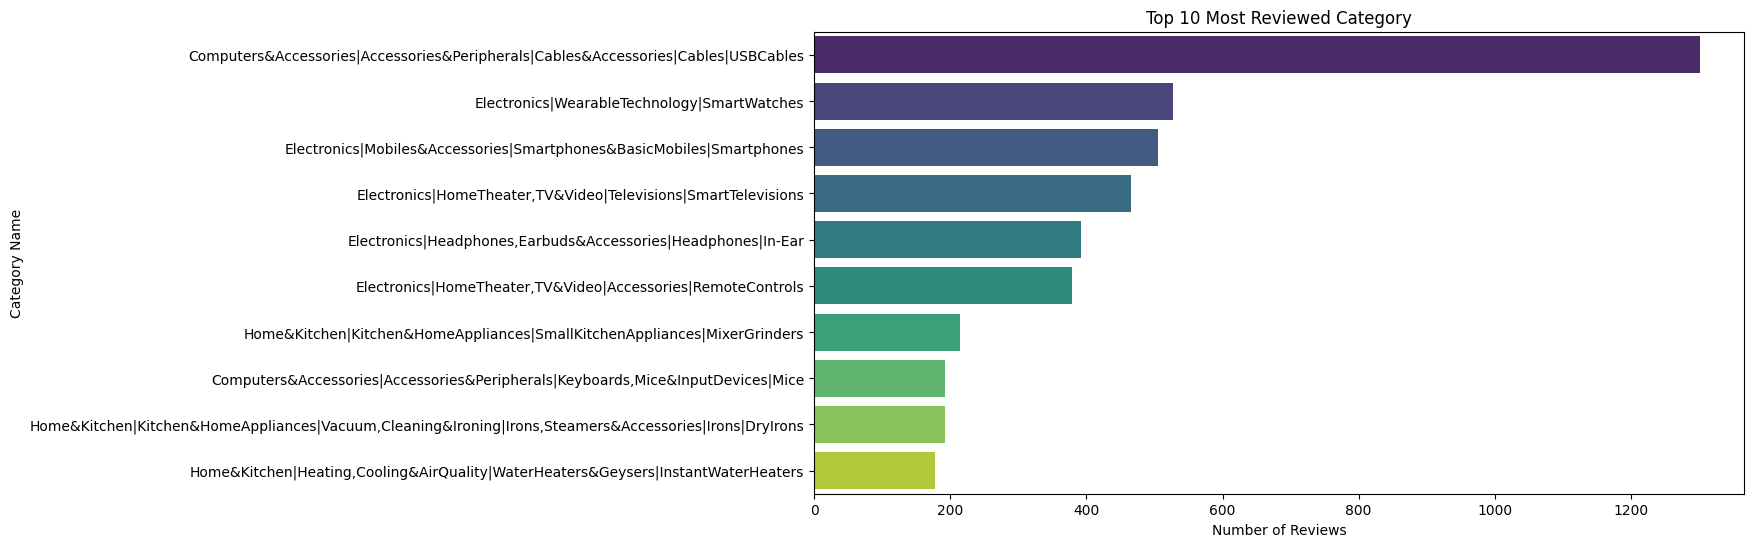

In [16]:
most_reviewed_category = df['category'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=most_reviewed_category.index, x=most_reviewed_category.values, palette='viridis')
plt.title('Top 10 Most Reviewed Category')
plt.xlabel('Number of Reviews')
plt.ylabel('Category Name')
plt.show()

C:\Users\khand\AppData\Local\Temp\ipykernel_1840\226495979.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='viridis')


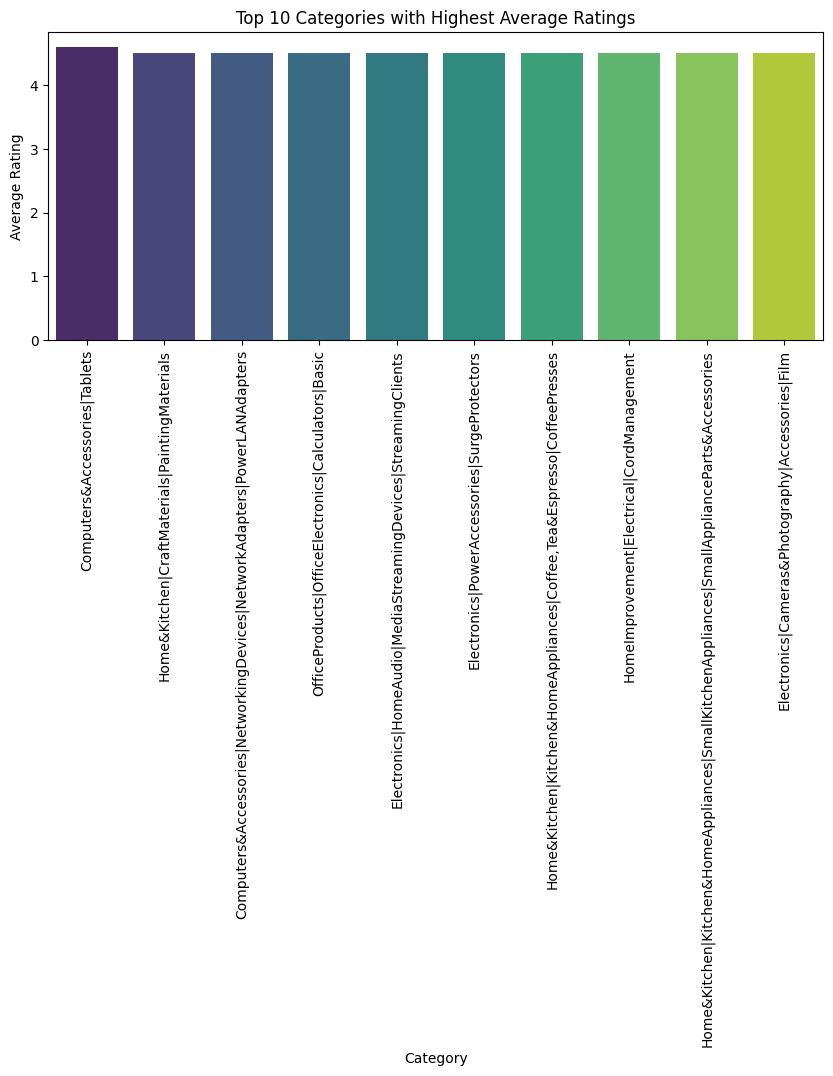

Top 10 Categories with Highest Average Ratings:
category
Computers&Accessories|Tablets                                                                 4.6
Home&Kitchen|CraftMaterials|PaintingMaterials                                                 4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                      4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                  4.5
Electronics|PowerAccessories|SurgeProtectors                                                  4.5
Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|CoffeePresses                         4.5
HomeImprovement|Electrical|CordManagement                                                     4.5
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|SmallApplianceParts&Accessories    4.5
Electronics|Cameras&Photography|Accessories|Film             

In [17]:
# Calculate the average rating for each category
avg_rating_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)

# Get the top 10 categories with the highest average ratings
top_10_categories = avg_rating_by_category.head(10)

# Plot the top 10 categories
plt.figure(figsize=(10, 4))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='viridis')
plt.title('Top 10 Categories with Highest Average Ratings')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

print("Top 10 Categories with Highest Average Ratings:")
print(top_10_categories)

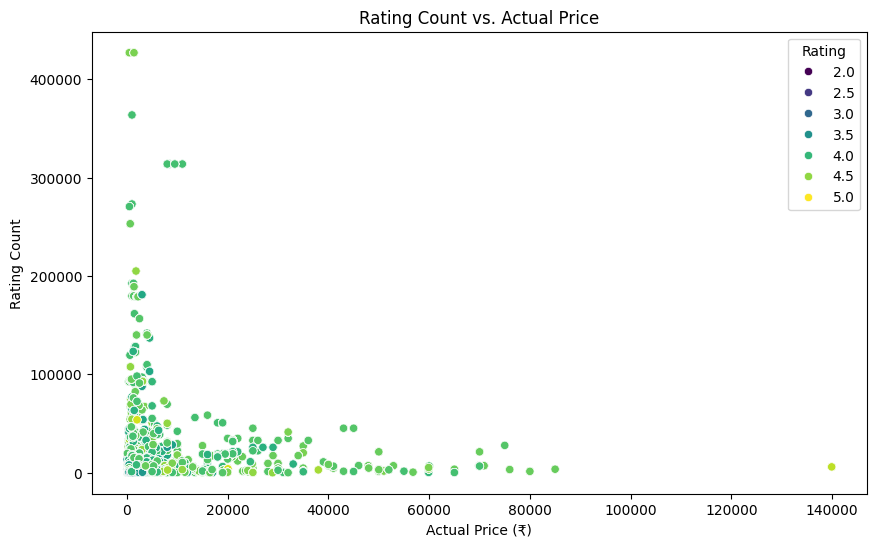

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='actual_price (₹)', y='rating_count', hue='rating', palette='viridis')
plt.title('Rating Count vs. Actual Price')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Rating Count')
plt.legend(title='Rating')
plt.show()

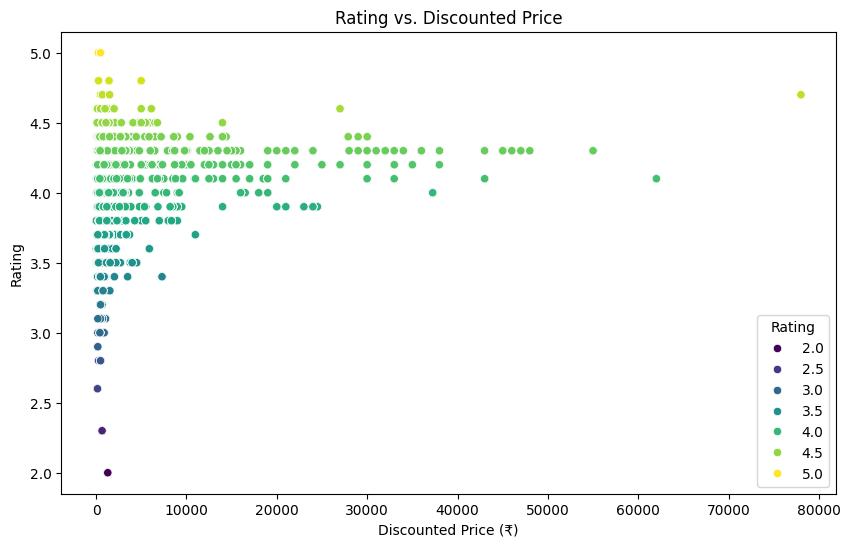

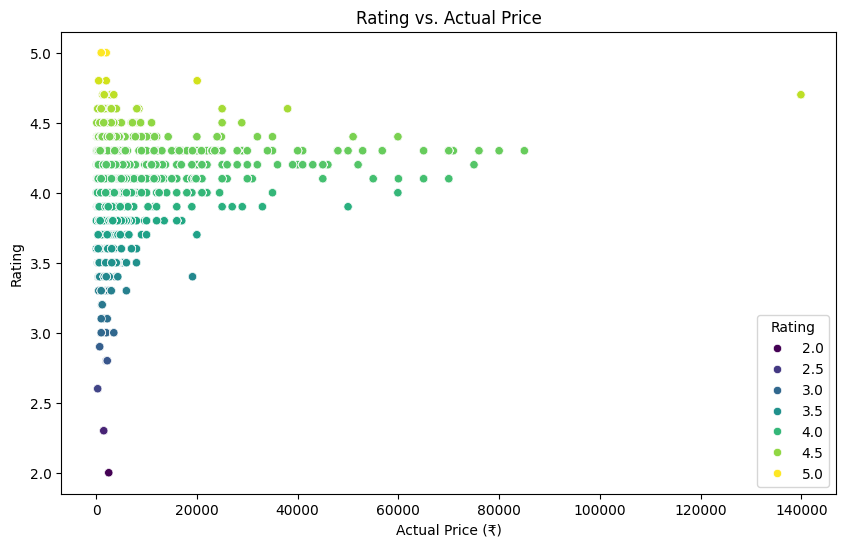

In [19]:
# Scatter plot for discounted price vs rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='discounted_price (₹)', y='rating', hue='rating', palette='viridis')
plt.title('Rating vs. Discounted Price')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Rating')
plt.legend(title='Rating')
plt.show()

# Scatter plot for actual price vs rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='actual_price (₹)', y='rating', hue='rating', palette='viridis')
plt.title('Rating vs. Actual Price')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Rating')
plt.legend(title='Rating')
plt.show()

In [20]:
from textblob import TextBlob

In [21]:
# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [22]:
# Apply the function to review titles
df['review_sentiment'] = df['review_title'].apply(lambda x: get_sentiment(str(x)))

C:\Users\khand\AppData\Local\Temp\ipykernel_1840\1018478502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rating', y='review_sentiment', palette='viridis')


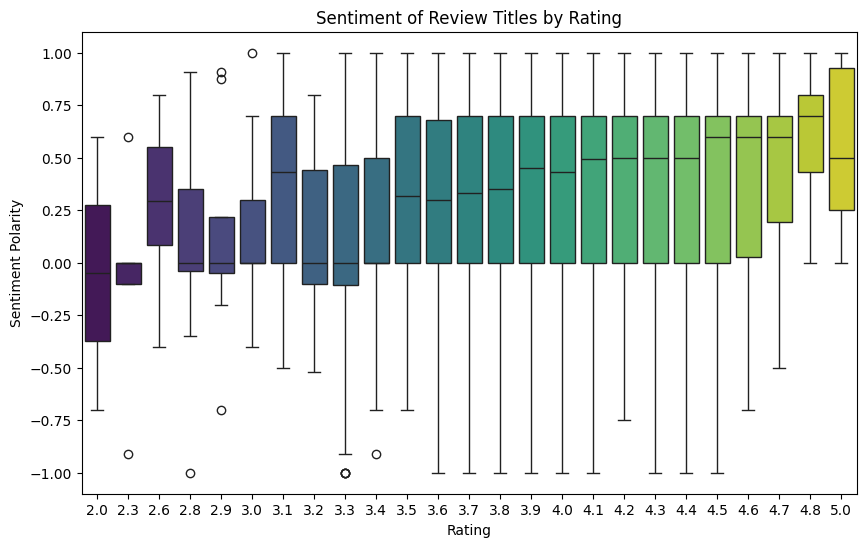

In [23]:
# Plot sentiment vs. rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='rating', y='review_sentiment', palette='viridis')
plt.title('Sentiment of Review Titles by Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment Polarity')
plt.show()

In [24]:
import numpy as np

def get_expression(rating):
    if rating > 4.5 and rating <= 5:
        return 'best'
    elif rating >= 4 and rating <= 4.5:
        return 'better'
    elif rating >= 3.5 and rating < 4:
        return 'good'
    elif rating >= 3 and rating < 3.5:
        return 'neutral'
    else:
        return 'not recommended'

df['Expression'] = df['rating'].apply(get_expression)

In [25]:
df.head(3)

,product_id,product_name,category,rating,rating_count,discounted_price (₹),actual_price (₹),discount_percentage (%),user_id,user_name,review_id,review_title,review_sentiment,Expression
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,24269,399.0,1099.0,64.0,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav,R3HXWT0LRP0NMF,Satisfied,0.5,better
1,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,24269,399.0,1099.0,64.0,AHMY5CWJMMK5BJRBBSNLYT3ONILA,Adarsh gupta,R2AJM3LFTLZHFO,Charging is really fast,0.2,better
2,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,24269,399.0,1099.0,64.0,AHCTC6ULH4XB6YHDY6PCH2R772LQ,Sundeep,R6AQJGUP6P86,Value for money,0.0,better


In [26]:
df.Expression.value_counts()

Expression
better             7793
good               2381
neutral             256
best                196
not recommended      39
Name: count, dtype: int64

In [27]:
df.rating.value_counts()

rating
4.1    1785
4.2    1652
4.3    1651
4.0    1283
3.9     925
4.4     890
3.8     666
4.5     532
3.7     317
3.6     266
3.5     207
4.6     118
3.3     112
3.4      80
4.7      45
3.0      25
3.1      25
4.8      19
2.8      16
3.2      14
5.0      14
2.6       8
2.9       8
2.3       5
2.0       2
Name: count, dtype: int64